In [1]:
import os
import matplotlib.pyplot as plt
current_dir = os.getcwd()
new_dir = current_dir.replace("\\tests", "")
os.chdir(new_dir)
from services.medias.video_processor import VideoProcessor
from DTOs.person_dto import PersonDTO
from models.medias.video import Video

Processing frame 0...
  #-Face detection-#
  Face detection: 0:00:00.464506
  #-Face comparison-#
  Face comparison: 0:00:01.983988
Processing frame 1...
  #-Face detection-#
  Face detection: 0:00:00.020999
  #-Face comparison-#
  Face comparison: 0:00:00.442496
  #-Face comparison-#
  Face comparison: 0:00:00.462000
Processing frame 2...
  #-Face detection-#
  Face detection: 0:00:00.020866
  #-Face comparison-#
  Face comparison: 0:00:00.421172
  #-Face comparison-#
  Face comparison: 0:00:00.432629
  #-Face comparison-#
  Face comparison: 0:00:00.412001
Processing frame 3...
  #-Face detection-#
  Face detection: 0:00:00.022001
  #-Face comparison-#
  Face comparison: 0:00:00.431552
  #-Face comparison-#
  Face comparison: 0:00:00.463113
  #-Face comparison-#
  Face comparison: 0:00:00.410129
Processing frame 4...
  #-Face detection-#
  Face detection: 0:00:00.021999
  #-Face comparison-#
  Face comparison: 0:00:00.431025
  #-Face comparison-#
  Face comparison: 0:00:00.428580
  #-

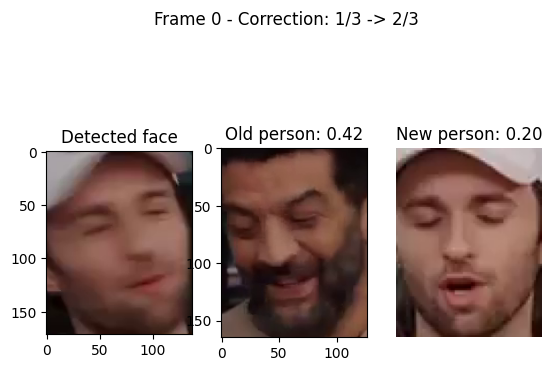

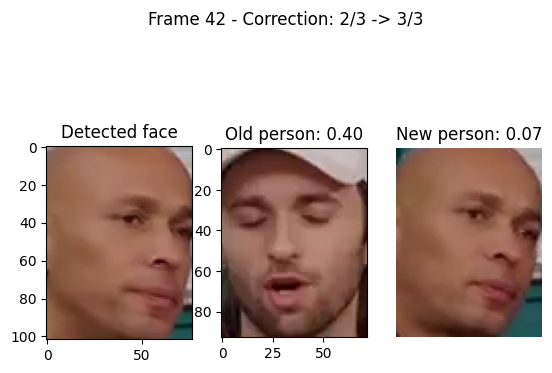

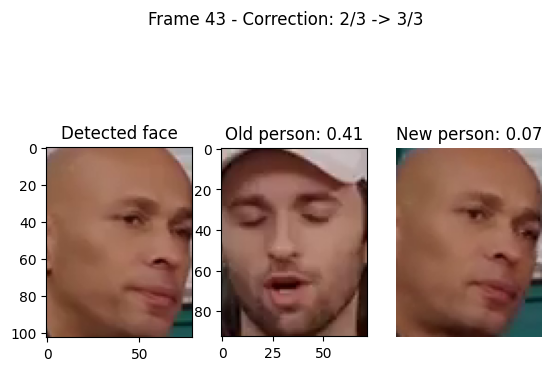

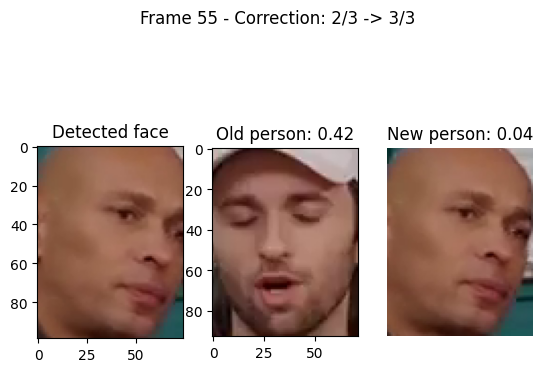

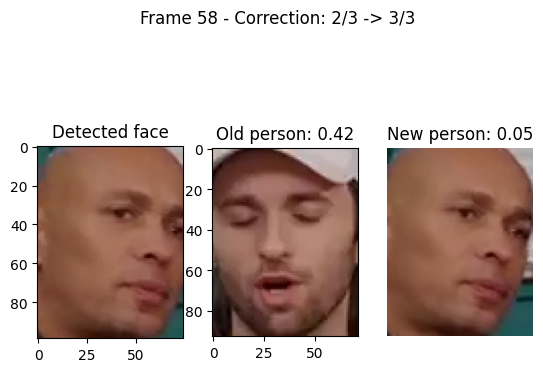

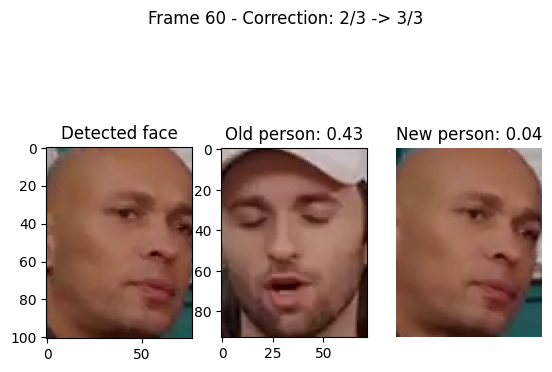

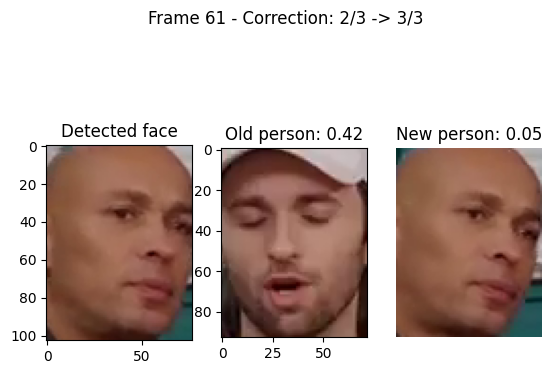

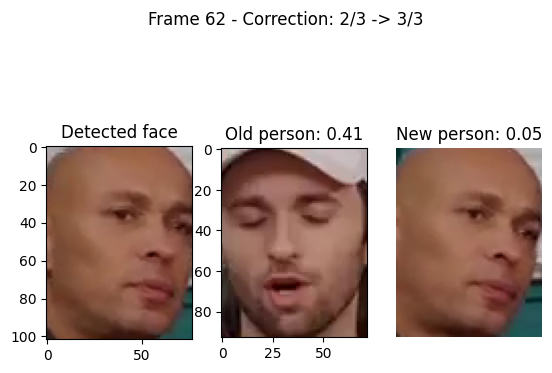

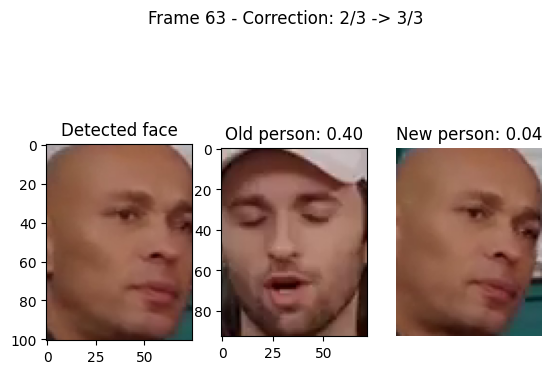

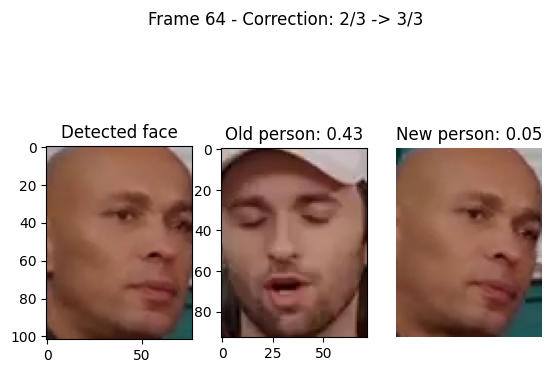

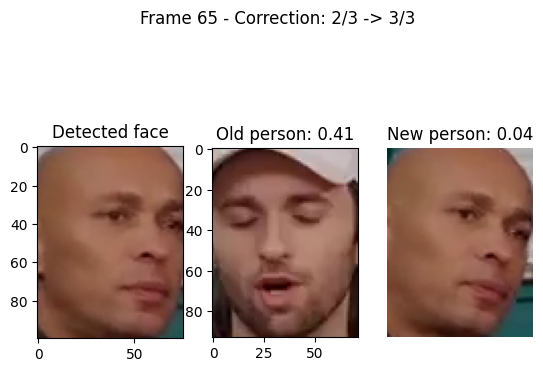

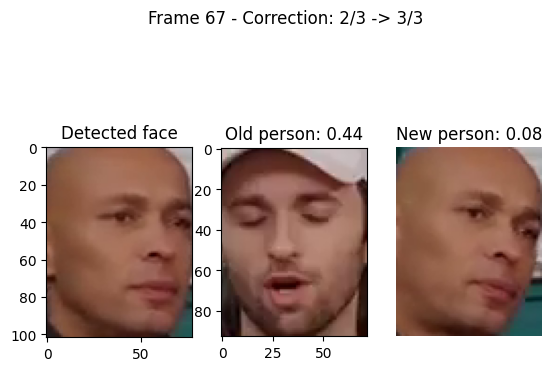

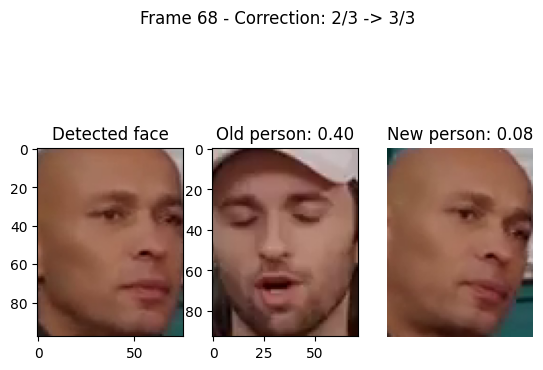

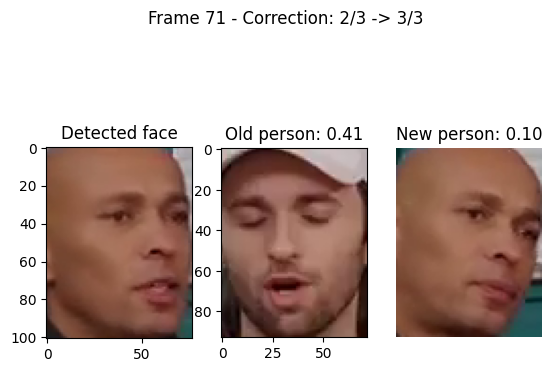

Detection times average: 0:00:00.087517
Comparison times average: 0:00:00.510849


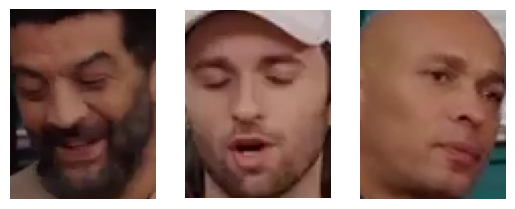

In [2]:
video: Video = Video("training//dataset//test//videos//QUI EST L IMPOSTEUR (ft Eric Ramzy).mp4")
video_processor: VideoProcessor = VideoProcessor(video)
personsDTO: list[PersonDTO] = video_processor.get_persons()
for personDTO in personsDTO:
    plt.subplot(1, len(personsDTO), personDTO.id+1)
    plt.imshow(personDTO.face)
    plt.axis('off')

In [ ]:
from datetime import timedelta


res = timedelta()
for time in video_processor.person_manager.detection_times:
    res += time

print(sum(video_processor.person_manager.detection_times, timedelta())/len(video_processor.person_manager.detection_times))
print("Detecion average time:", res/len(video_processor.person_manager.detection_times))

res = timedelta()
for time in video_processor.person_manager.comparison_times:
    res += time
print(sum(video_processor.person_manager.detection_times, timedelta())/len(video_processor.person_manager.detection_times))
print("Comparison average time:", res/len(video_processor.person_manager.comparison_times))

In [ ]:
from services.image_editor import ImageEditor
from cv2 import VideoWriter, VideoWriter_fourcc


def save(personsDTO: list[PersonDTO], output_video_path: str = "output.mp4") -> None:
        fourcc = VideoWriter_fourcc(*'MP4V')
        frame_index = 0
        frame = video_processor.video.get_nth_frame(frame_index)
        shape = frame.shape
        out = VideoWriter(output_video_path, fourcc, video_processor.video.fps, (shape[1], shape[0]))

        persons_id_to_blur: list[int] = []
        for personDTO in personsDTO:
            if personDTO.should_be_blur:
                persons_id_to_blur.append(personDTO.id)
                print(f"Person {personDTO.id} should be blur")

        while frame is not None:
            print(f"Saving frame {frame_index}")
            persons_in_this_frame: list[int] = video_processor.person_manager.get_persons_id_in_frame(frame_index)
            print(f"Persons in frame {frame_index}: {persons_in_this_frame}")
            for person_id in persons_in_this_frame:
                if person_id in persons_id_to_blur:
                    print(f"Bluring person {person_id} in frame {frame_index}")
                    person = video_processor.person_manager.persons[person_id]
                    frame = ImageEditor.blur(frame, person.get_face(frame_index).prediction.bounding_box)
            
            frame = ImageEditor.RGB_to_BGR(frame)
            out.write(frame)
            frame = video_processor.video.get_next_frame()
            frame_index += 1

        out.release()

In [ ]:
# Blur squeezie

personsDTO[1].should_be_blur = True
for personDTO in personsDTO:
    print(personDTO)
save(personsDTO=personsDTO, output_video_path="output.mp4")